In [ ]:
import tensorflow as tf


tf.config.set_visible_devices([], 'GPU')


# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     print("GPU:", gpus)
# else:
#     print("No GPU detected")

In [445]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
from random import choice
df = pd.read_csv('../src/data/california.csv')
df.Date = pd.to_datetime(df.Date)

avocado, avocado_test = pd.Series(df.TotalVolume)[0:400], pd.Series(df.TotalVolume)[400:]
prices, prices_test = pd.Series(df.Delta)[0:400], pd.Series(df.Delta)[400:]
# prices, prices_test = pd.Series(df.AveragePrice)[0:400], pd.Series(df.AveragePrice)[400:]

dates = df.Date[:400]

avocado.index = df.Date.iloc[0:400]
prices.index = df.Date.iloc[0:400]

# for _ in range(40):
#     i = randint(0, 399)
#     avocado[i] = 0
#     prices[i] = choice([0.5])





data = pd.concat((prices, avocado), axis=1)
data.shape


(400, 2)

In [446]:
lookback = 52
fh = 1

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [447]:
def create_sequences(data, lookback, fh):
    X = np.lib.stride_tricks.sliding_window_view(data, lookback, 0).transpose((0, 2, 1))[1:, :, :]
    # X = []
    j = int(348 * 0.8) + 15
    y = []
    for i in range(len(data) - lookback - fh + 1):
        y.append(data[i + lookback, 1])
        # X.append(
        #     np.vstack(
        #         (data[i + fh : i + fh + lookback, 0],
        #         data[i : i + lookback, 1])
        #     ).T
        # )
    X = np.array(X)
    print(X.shape)
    print(X[j, :, :])
    return X, np.array(y)

X, y = create_sequences(scaled_data, lookback, fh)
X.shape
y.shape
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

(348, 52, 2)
[[0.41094301 0.51452601]
 [0.45181941 0.47025744]
 [0.4664839  0.49013726]
 [0.28791444 0.51877192]
 [0.55237438 0.42922296]
 [0.45463956 0.41992629]
 [0.46759224 0.3897991 ]
 [0.33685801 0.44344781]
 [0.4769267  0.38333678]
 [0.45201416 0.33622641]
 [0.46392369 0.34333739]
 [0.30066207 0.388469  ]
 [0.57156484 0.31479687]
 [0.32423264 0.36056772]
 [0.58227621 0.19796069]
 [0.23329317 0.39374396]
 [0.53688966 0.33428356]
 [0.51456945 0.32950713]
 [0.31652188 0.34658117]
 [0.31659276 0.52669343]
 [0.61269052 0.48498619]
 [0.5305805  0.44326581]
 [0.39415463 0.4421956 ]
 [0.44290828 0.41399048]
 [0.17774727 0.74528398]
 [0.70803402 0.38476076]
 [0.46904925 0.38991449]
 [0.39086778 0.41557516]
 [0.54666005 0.39114522]
 [0.36980255 0.42366889]
 [0.53039437 0.36073366]
 [0.40105557 0.40161588]
 [0.61934269 0.34498765]
 [0.36324612 0.36395793]
 [0.47980335 0.36206207]
 [0.4393642  0.33609723]
 [0.19490696 0.49301894]
 [0.61278562 0.3976919 ]
 [0.43707072 0.36568343]
 [0.39056883

In [448]:
model = Sequential()
model.add(LSTM(
    units=200,
    activation='relu',
    input_shape=(lookback, 2),
    return_sequences=True
))
model.add(Dropout(0.2))
# model.add(LSTM(
#     units=50,
#     activation='relu',
#     return_sequences=True
#     # input_shape=(lookback, 2)
# ))
model.add(LSTM(
    units=30,
    activation='relu',
    # input_shape=(lookback, 2)
))

model.add(Dropout(0.2))
model.add(Dense(1))
# model.compile(optimizer='adam', loss=tf.keras.losses.Huber())
model.compile(optimizer='adam', loss='mse')

model.summary()

/Users/grigorychaykovsky/retail_forecasts/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_53 (LSTM)                  │ (None, 52, 200)        │       162,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 52, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 30)             │        27,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,151 (742.78 KB)

 Trainable params: 190,151 (742.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.1226 - val_loss: 0.0128
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0337 - val_loss: 0.0215
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0306 - val_loss: 0.0135
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0205 - val_loss: 0.0085
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0282 - val_loss: 0.0109
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0222 - val_loss: 0.0110
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0189 - val_loss: 0.0084
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0250 - val_loss: 0.0098
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0200 - val_loss: 0.0091
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0238 - val_loss: 0.0097
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172 - val_loss: 0.0086
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0205 - val_loss: 0.0084
E

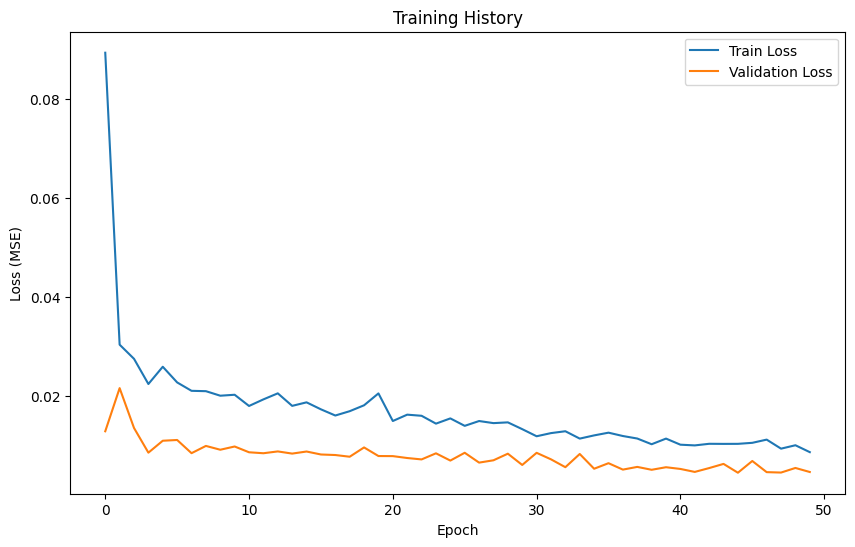

In [449]:
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.1, 
    verbose=1
)

# 6. Evaluate the Model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

# 7. Make Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions (only for demand, since y is demand)
# Create a dummy array for inverse scaling (price column is ignored)
y_test_scaled = np.zeros((len(y_test), 2))
y_test_scaled[:, 1] = y_test
y_pred_scaled = np.zeros((len(y_pred), 2))
y_pred_scaled[:, 1] = y_pred[:, 0]

y_test_original = scaler.inverse_transform(y_test_scaled)[:, 1]
y_pred_original = scaler.inverse_transform(y_pred_scaled)[:, 1]



# 9. Plot Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

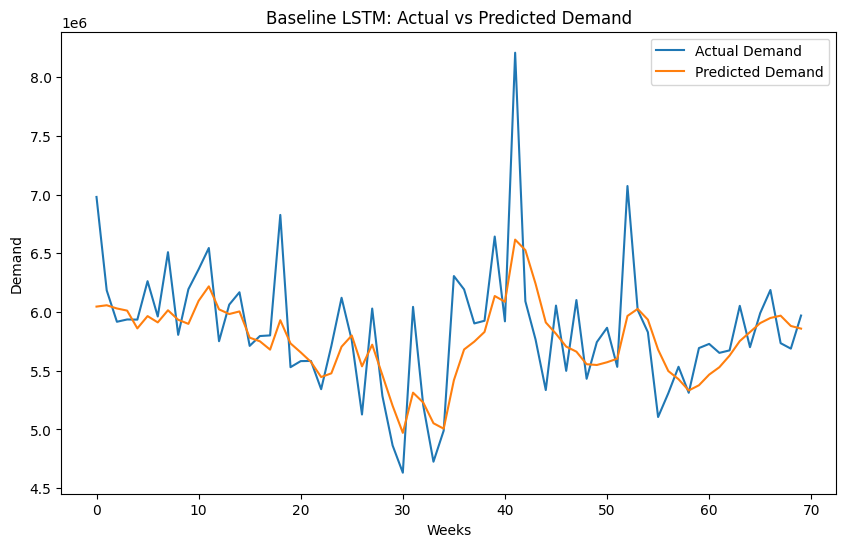

In [452]:
# 8. Plot Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Demand')
plt.plot(y_pred_original, label='Predicted Demand')
plt.title('Baseline LSTM: Actual vs Predicted Demand')
plt.xlabel('Weeks')
plt.ylabel('Demand')
plt.legend()
plt.savefig('../src/graphics/lstm_forecasts.png')
plt.show()

In [457]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test_original, y_pred_original)


0.03810641739375559
